### Open Air Test Objective
The results from this test will inform propeller selection for the rest of our testing. While we expect duct aerodynamics to change relative propeller performance, this test will ensure we are capable of producing enough thrust for our application (hovering flight with a payload).

Props that produce significantly less thrust than required to lift a payload (~12 N) will be eliminated and a propeller with high power efficiency around the 12 N range will be selected, with slight preference toward high efficiency in the 8 N range (flight without payload) and high full throttle thrust.

This test will also validate full throttle performance of our new motors as their lower KV rating will result in a reduced maximum test rpm. We must ensure that they spin our propellers fast enough to produce the thrust required for flight with a payload.

### Procedure
- Initiate sweep from 0-100% throttle in increments of 5%, holding each throttle for 2 seconds.
- At each throttle step, allow ~0.5s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Open Air Test Configurations
| Propeller Type    | Propeller Diameter    | Propeller Pitch  | Propeller Tip Profile | Test Status |
|-                  |-                      |-                 |-                      |-            |
| HQ Prop 6-blade   | 5 in / 127 mm         |  4               | Unshaved              | In Progress |
| HQ Prop 3-blade   | 5 in / 127 mm         |  4               | Unshaved              | In Progress |
| Toroidal 2-blade  | 5.1 in / 129.54 mm    |  4.5             | Unshaved              | In Progress |
| White 3-blade     | 7 in / 177.8 mm       |  3.5             | Unshaved              | In Progress |
| HQ Prop 4-blade   | 6 in / 152.4 mm       |  3.8             | Unshaved              | In Progress |
| HQ Prop 6-blade   | TBD                   |  4               | Shaved                | Blocked     |

### Hypothesis
- For propellers of the same diameter, we expect configurations with higher blade count and higher pitch to produce greater thrust. We expect low pitch, low blade count propellers to produce less thrust, but have higher thrust-power efficiency. 
- As propeller diameter is increased, both thrust and thrust-power efficiency are expected to improve.

### Analysis
Average battery voltage, motor currents, and thrust will be collected for each throttle step after the transients stabilize, and a thrust vs. electrical power plot will be made to compare all props.

### Observations

For our first few full throttle tests, we noticed our thrust start to decrease as throttle went above about 75%, the root cause of this was determined to be the movable carriage hitting the end stops, which were taking up some of the load since the jig was remounted to a new base and the relative positioning of components changed since the last test.

In [3]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 0 to 100% throttle in increments of 5%, holding at each step for 2 seconds

In [4]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 2_000
step_range = np.arange(5, 101, 5)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

In [5]:
# Initialize short thrust test to validate propeller mounting direction after changing props
test_duration_ms = 2000
mount_test_throttle = 10
perform_mounting_test = True

mount_test_plan = TestPlan("test", steps=[TestStep(bottom_throttle=mount_test_throttle, top_throttle=mount_test_throttle, duration_ms=test_duration_ms)])

### Execute Tests

In [6]:
test_directory = Path("../test_data/open_air/")
data_dict = {}

In [7]:
### Execute optional mounting test
if (perform_mounting_test):
    test_run(filename=None, plan=mount_test_plan)

SerialException: could not open port 'COM9': FileNotFoundError(2, 'The system cannot find the file specified.', None, 2)

In [8]:
### 5 INCH 6 BLADE TEST RUNS
data_dict["test_5in_6blade"] = test_run(
    filename=test_directory / "test_5in_6blade.csv", plan=plan
)
data_dict["test_5in_6blade_rerun"] = test_run(
    filename=test_directory / "test_5in_6blade_rerun.csv", plan=plan
)
data_dict["test_5in_6blade_rerun_0"] = test_run(
    filename=test_directory / "test_5in_6blade_rerun_0.csv", plan=plan
)
data_dict["test_5in_6blade_rerun_1"] = test_run(
    filename=test_directory / "test_5in_6blade_rerun_1.csv", plan=plan
)
data_dict["test_5in_6blade_rerun_2"] = test_run(
    filename=test_directory / "test_5in_6blade_rerun_2.csv", plan=plan
)
# data_dict["test_5in_6blade_1500um"] = test_run(
#     filename=test_directory / "test_5in_6blade_1500um.csv", plan=plan
# )

### 5 INCH 3 BLADE TEST RUNS
data_dict["test_5in_3blade"] = test_run(
    filename=test_directory / "test_5in_3blade.csv", plan=plan
)
data_dict["test_5in_3blade_rerun"] = test_run(
    filename=test_directory / "test_5in_3blade_rerun.csv", plan=plan
)
data_dict["test_5in_3blade_rerun_0"] = test_run(
    filename=test_directory / "test_5in_3blade_rerun_0.csv", plan=plan
)

# ### 5 INCH TOROIDAL TEST RUNS
# data_dict["test_5in_toroidal"] = test_run(
#     filename=test_directory / "test_5in_toroidal.csv", plan=plan
# )
# data_dict["test_5in_toroidal_rerun"] = test_run(
#     filename=test_directory / "test_5in_toroidal_rerun.csv", plan=plan
# )

### MISC PROPELLER TESTING
#
# data_dict["test_5in_4blade_blue"] = test_run(
#     filename=test_directory / "test_5in_4blade_blue.csv", plan=plan
# )
# data_dict["test_6in_4blade"] = test_run(
#     filename=test_directory / "test_6in_4blade.csv", plan=plan
# )
# data_dict["test_7in_3blade"] = test_run(
#     filename=test_directory / "test_7in_3blade.csv", plan=plan
# )

Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data
Loading saved data


### Data Analysis

In [9]:
# Aggregate test data
df_all = pd.concat(data_dict, names=["test_name"])
df_all

top_motor_rpm  bottom_motor_rpm  \
test_name               time_ms                                      
test_5in_6blade         0.446                0.0               0.0   
                        5.174                0.0               0.0   
                        8.154                0.0               0.0   
                        11.162               0.0               0.0   
                        14.154               0.0               0.0   
...                                          ...               ...   
test_5in_3blade_rerun_0 41970.158         1385.0            1171.0   
                        41973.154         1385.0            1128.0   
                        41977.158         1271.0            1100.0   
                        41980.154         1271.0            1000.0   
                        41983.150         1142.0             957.0   

                                   batt_voltage_V  batt_current_A  \
test_name               time_ms                                     
test_5in_6blade         0.446           18.018000           10.24   
                        5.174           17.240999           10.24   
                        8.154           17.052000           10.24   
                        11.162          16.926001           10.24   
                        14.154          16.841999           10.24   
...                                           ...             ...   
test_5in_3blade_rerun_0 41970.158       16.023001           10.24   
                        41973.154       16.023001           10.24   
                        41977.158       16.023001           10.24   
                        41980.154       16.023001           10.24   
                        41983.150       16.023001           10.24   

                                   top_current_A  bottom_current_A  thrust_N  \
test_name               time_ms                                                
test_5in_6blade         0.446            0.08724          -0.36166 -0.130701   
                        5.174            0.14540          -0.29211 -0.130701   
                        8.154            0.08724          -0.25038 -0.130701   
                        11.162           0.10178          -0.22256 -0.130701   
                        14.154           0.15994          -0.20865 -0.130701   
...                                          ...               ...       ...   
test_5in_3blade_rerun_0 41970.158        0.13086          -0.33384  1.802477   
                        41973.154        0.13086          -0.12519  1.447991   
                        41977.158        0.20356          -0.20865  1.447991   
                        41980.154        0.01454          -0.20865  1.447991   
                        41983.150        0.20356          -0.20865  1.447991   

                                   torque_N  
test_name               time_ms              
test_5in_6blade         0.446     -0.000675  
                        5.174     -0.000675  
                        8.154     -0.000675  
                        11.162    -0.000675  
                        14.154    -0.000675  
...                                     ...  
test_5in_3blade_rerun_0 41970.158  0.005411  
                        41973.154  0.005411  
                        41977.158  0.005411  
                        41980.154  0.005411  
                        41983.150  0.005411  

[110105 rows x 8 columns]

In [10]:
# Select single test to analyze closer
test_data = df_all.loc["test_5in_6blade"]
test_data

,top_motor_rpm,bottom_motor_rpm,batt_voltage_V,batt_current_A,top_current_A,bottom_current_A,thrust_N,torque_N
time_ms,,,,,,,,
0.446,0.0,0.0,18.018000,10.24,0.08724,-0.36166,-0.130701,-0.000675
5.174,0.0,0.0,17.240999,10.24,0.14540,-0.29211,-0.130701,-0.000675
8.154,0.0,0.0,17.052000,10.24,0.08724,-0.25038,-0.130701,-0.000675
11.162,0.0,0.0,16.926001,10.24,0.10178,-0.22256,-0.130701,-0.000675
14.154,0.0,0.0,16.841999,10.24,0.15994,-0.20865,-0.130701,-0.000675
...,...,...,...,...,...,...,...,...
41969.158,1528.0,1471.0,15.834000,10.24,0.08724,-0.12519,1.714019,0.007230
41972.154,1528.0,1485.0,15.834000,10.24,-0.00000,-0.29211,1.714019,0.007230
41975.158,1457.0,1400.0,15.813000,10.24,0.05816,-0.11128,1.714019,0.007230


In [11]:
# Extract raw data from a loaded test csv
top_current_raw = test_data["top_current_A"]
bottom_current_raw = test_data["bottom_current_A"]
hall_current_raw = top_current_raw + bottom_current_raw

shunt_current_raw = test_data["batt_current_A"]
batt_voltage = test_data["batt_voltage_V"]

top_rpm = test_data["top_motor_rpm"]
bottom_rpm = test_data["bottom_motor_rpm"]

thrust_N = test_data["thrust_N"]
time_ms = test_data.index

# Determine mean sample rate
sample_rate_ms = np.mean(np.diff(time_ms))

In [12]:
# Generate buckets for averaging based on step duration defined in testing
stable_step_duration_ms = step_duration_ms / 2
transient_offset_ms = (
    500  # Ignore first 500 ms of each throttle step to allow transients to settle
)
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "throttle"])
    .mean()
)

df_steps

top_motor_rpm  bottom_motor_rpm  \
test_name               throttle                                    
test_5in_3blade         5           1755.638037       1762.487730   
                        10          3148.245399       3146.815951   
                        15          4425.843077       4447.944615   
                        20          5617.714724       5734.122699   
                        25          6850.245399       6914.877301   
...                                         ...               ...   
test_5in_6blade_rerun_2 80         15612.533537      15352.048780   
                        85         16158.945455      15857.266667   
                        90         16571.966463      16488.533537   
                        95         16996.733945      16878.385321   
                        100        17376.574924      17294.889908   

                                  batt_voltage_V  batt_current_A  \
test_name               throttle                                   
test_5in_3blade         5              16.871117       10.240000   
                        10             16.860102       10.240000   
                        15             16.835279       10.240000   
                        20             16.807407       10.240000   
                        25             16.748723       10.240000   
...                                          ...             ...   
test_5in_6blade_rerun_2 80             14.867040       41.674878   
                        85             14.575591       47.287758   
                        90             14.317966       52.390976   
                        95             14.048679       57.664098   
                        100            13.770734       62.435230   

                                  top_current_A  bottom_current_A   thrust_N  \
test_name               throttle                                               
test_5in_3blade         5              0.260114         -0.112816   0.004457   
                        10             0.392179          0.009259  -0.005481   
                        15             0.553102          0.146975   0.031409   
                        20             0.744216          0.361575   0.724957   
                        25             1.127519          0.768890   1.250395   
...                                         ...               ...        ...   
test_5in_6blade_rerun_2 80            19.025368         16.366896  12.656197   
                        85            21.601021         18.846533  13.520594   
                        90            24.223596         21.937978  14.321883   
                        95            27.363613         24.136785  15.085861   
                        100           30.089485         26.683761  15.596217   

                                  torque_N  
test_name               throttle            
test_5in_3blade         5         0.000284  
                        10        0.001952  
                        15        0.004603  
                        20        0.008641  
                        25        0.012086  
...                                    ...  
test_5in_6blade_rerun_2 80        0.070465  
                        85        0.076995  
                        90        0.083639  
                        95        0.089581  
                        100       0.096398  

[160 rows x 8 columns]

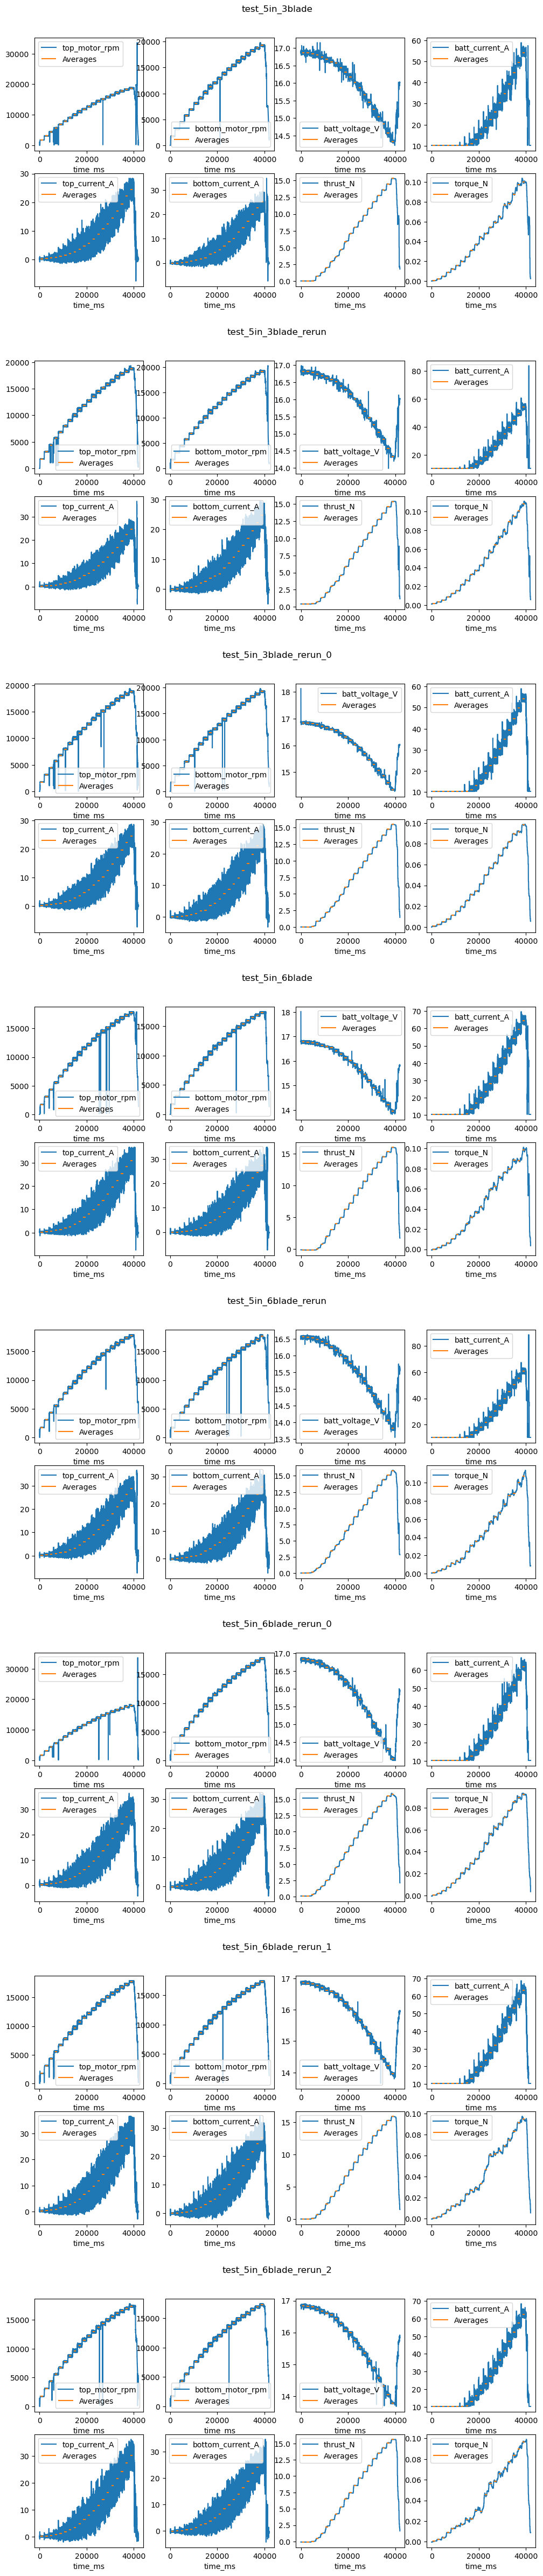

In [13]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index("test_name").plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

In [14]:
thrust_mean_g = df_steps["thrust_N"] / 9.81 * 1e3
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)
hover_thrust_g = 750
payload_thrust_g = 1200

#thrust_mean_g_err = 

hall_current_mean = df_steps["top_current_A"] + df_steps["bottom_current_A"]
hall_current_rel_err = (0.161 * hall_current_mean + 0.288) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]
batt_voltage_rel_err = 0.06

shunt_current_mean = df_steps["batt_current_A"]

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2) * batt_power_mean

shunt_power_mean = shunt_current_mean * batt_voltage_mean

df_thrust_power = pd.DataFrame(
    {
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": batt_power_err
    }
)

In [15]:
batt_power_err

test_name                throttle
test_5in_3blade          5             5.261094
                         10            5.959255
                         15            6.783067
                         20            7.911775
                         25           10.118472
                                        ...    
test_5in_6blade_rerun_2  80           94.430225
                         85          105.237764
                         90          117.433351
                         95          128.110678
                         100         138.051179
Length: 160, dtype: float64

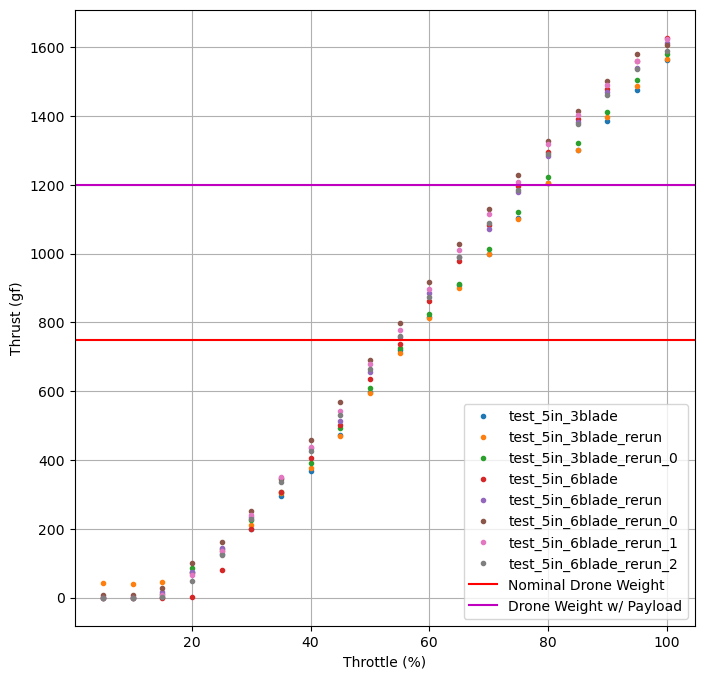

In [16]:
thrust_mean_g.unstack("test_name").plot(style=".", figsize=(8, 8))
plt.xlabel("Throttle (%)")
plt.ylabel("Thrust (gf)")
plt.axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
plt.axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
plt.legend()
plt.grid()
plt.show()

In [17]:
# TODO: nominal thrust-weight ratio plot
# thrust_mean_g.iloc[-1] / hover_thrust_g

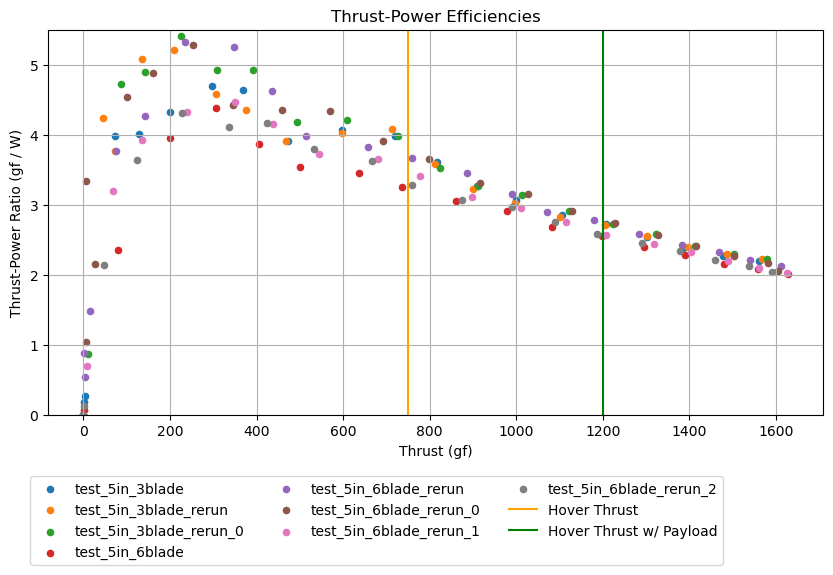

In [18]:
fig = plt.figure(figsize=(10, 5))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.scatter(x="thrust_mean_g", y="thrust_power_g_W", data=grp, label=n, s=20)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
plt.ylim(0,5.5)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

### Power Measurement Uncertainty
In order to verify that our tests are repeatable, we need some expected uncertainty for power measurements. It was derived in the hall sensor calibration notebook that the combined uncertainty for a current measurement which sums top motor and bottom motor hall sensor readings is a linear function of the measured current $I_{tot}$

$$\sigma_{I_{tot}} = 0.161 I_{tot} + 0.288 A$$

The uncertainty in voltage measurements can be approximated using the standard deviation of battery voltage measurements at constant voltage (under no load):

$$\sigma_{V_{bat}} = 0.025 V$$

Propagating these uncertainties into our power calculation $P=IV$, we can take the rms value of uncertainties in $I_{tot}$ and $V_{bat}$

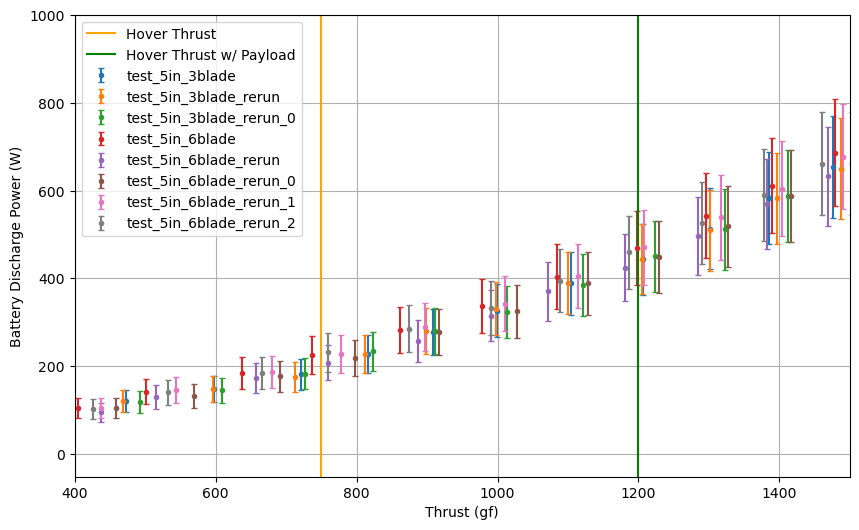

In [19]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    #plt.scatter(x="thrust_mean_g", y="batt_power_mean", data=grp, label=n, s=20)
    plt.errorbar(x="thrust_mean_g", y="batt_power_mean", yerr="batt_power_err", label=n, data=grp, fmt='o', capsize=2, markersize=3)
plt.xlabel("Thrust (gf)")
plt.ylabel("Battery Discharge Power (W)")
plt.xlim(400, 1500)
plt.grid()
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.legend()
plt.show()

In [ ]:
characteristic_thrust = pd.Index(
    [hover_thrust_g, payload_thrust_g], name="thrust_mean_g"
)
# Interpolate power at hover and payload thrust
df_power_interp = (
    df_thrust_power.reset_index("throttle")
    .set_index("thrust_mean_g", append=True)
    .groupby("test_name")
    .apply(
        lambda g: (gd := g.droplevel("test_name").dropna())[
            ~gd.index.duplicated(keep="first")
        ]
        .reindex(gd.index.append(characteristic_thrust).unique())
        .sort_index()
        .interpolate(method="index", limit_area="inside")
        .loc[characteristic_thrust]
    )
)
df_power_interp

throttle  batt_power_mean  \
test_name               thrust_mean_g                               
test_5in_6blade         750.0          55.555152       232.594791   
                        1200.0         75.104333       470.201963   
test_5in_6blade_1500um  750.0          61.124838       235.883249   
                        1200.0         85.627166       511.496011   
test_5in_6blade_rerun   750.0          54.559476       204.114709   
                        1200.0         75.938732       438.087792   
test_5in_6blade_rerun_0 750.0          52.754020       199.748557   
                        1200.0         73.560964       431.485662   
test_5in_6blade_rerun_1 750.0          53.601290       216.193357   
                        1200.0         74.592033       465.623134   
test_5in_6blade_rerun_2 750.0          54.473566       226.573058   
                        1200.0         75.665383       468.052347   

                                       shunt_power_mean  thrust_power_g_W  \
test_name               thrust_mean_g                                       
test_5in_6blade         750.0                324.368598          3.229140   
                        1200.0               571.213074          2.552638   
test_5in_6blade_1500um  750.0                310.994437          3.192340   
                        1200.0               585.819271          2.347574   
test_5in_6blade_rerun   750.0                282.959067          3.676573   
                        1200.0               532.672201          2.744060   
test_5in_6blade_rerun_0 750.0                279.008699          3.768446   
                        1200.0               522.647072          2.785969   
test_5in_6blade_rerun_1 750.0                301.784954          3.478023   
                        1200.0               556.166551          2.579150   
test_5in_6blade_rerun_2 750.0                306.737510          3.316882   
                        1200.0               561.073960          2.565991   

                                       shunt_thrust_power_g_W  
test_name               thrust_mean_g                          
test_5in_6blade         750.0                        2.311931  
                        1200.0                       2.101010  
test_5in_6blade_1500um  750.0                        2.414258  
                        1200.0                       2.049164  
test_5in_6blade_rerun   750.0                        2.650963  
                        1200.0                       2.254545  
test_5in_6blade_rerun_0 750.0                        2.689144  
                        1200.0                       2.298835  
test_5in_6blade_rerun_1 750.0                        2.486666  
                        1200.0                       2.158413  
test_5in_6blade_rerun_2 750.0                        2.446506  
                        1200.0                       2.139674

In [ ]:
battery_capacity_Wh = 2 * 0.850 * 14.8
flight_time = pd.to_timedelta(
    battery_capacity_Wh / df_power_interp["batt_power_mean"], unit="h"
).rename("flight_time")
flight_time

test_name                thrust_mean_g
test_5in_6blade          750.0           0 days 00:06:29.415427056
                         1200.0          0 days 00:03:12.632117835
test_5in_6blade_1500um   750.0           0 days 00:06:23.986570536
                         1200.0          0 days 00:02:57.080559768
test_5in_6blade_rerun    750.0           0 days 00:07:23.750479927
                         1200.0          0 days 00:03:26.753079258
test_5in_6blade_rerun_0  750.0           0 days 00:07:33.450083921
                         1200.0          0 days 00:03:29.916592797
test_5in_6blade_rerun_1  750.0           0 days 00:06:58.958294342
                         1200.0          0 days 00:03:14.526417276
test_5in_6blade_rerun_2  750.0           0 days 00:06:39.765094682
                         1200.0          0 days 00:03:13.516816057
Name: flight_time, dtype: timedelta64[ns]

<Axes: title={'center': 'Flight time with a 4S 1700mAh battery pack'}, xlabel='Thrust (gf)', ylabel='Flight time (minutes)'>

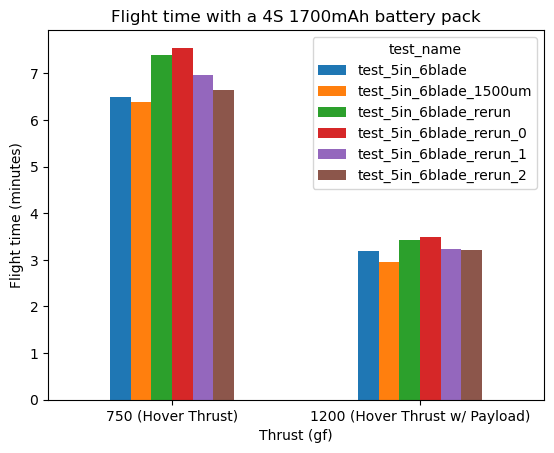

In [ ]:
(
    flight_time.dt.seconds.unstack("test_name").rename(
        index={
            hover_thrust_g: f"{hover_thrust_g} (Hover Thrust)",
            payload_thrust_g: f"{payload_thrust_g} (Hover Thrust w/ Payload)",
        }
    )
    / 60
).plot.bar(
    title="Flight time with a 4S 1700mAh battery pack",
    xlabel="Thrust (gf)",
    ylabel="Flight time (minutes)",
    rot=0,
)